# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [4]:
from scipy.stats import uniform

# Define the range
a = 10  # Lower bound
b = 20  # Upper bound

# Generate 10 random numbers between a and b
random_numbers = uniform.rvs(loc=a, scale=b-a, size=10)

print("Random Numbers:", random_numbers)

Random Numbers: [10.77495166 15.64308328 13.41803182 19.94260108 18.14321765 16.25136523
 16.49107628 10.65392356 15.51292997 16.41878137]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [78]:
def generate_uniform_random_numbers(bottom, ceiling, count):
    """
    Generate uniformly distributed random numbers.

    Arg(s):
    - bottom (float): Lower boundary of the range.
    - ceiling (float): Upper boundary of the range.
    - count (int): Number of random numbers to generate.

    Returns:
    - numpy.ndarray: Array of uniformly distributed random numbers.
    """
    return np.random.uniform(bottom, ceiling, count)

In [80]:
# Call the function with the specified parameters
set_1 = generate_uniform_random_numbers(10, 15, 100)
set_2 = generate_uniform_random_numbers(10, 60, 1000)

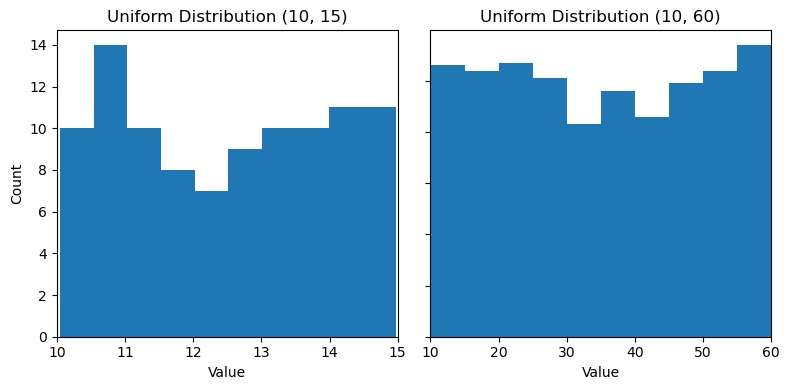

In [82]:
# Plot histograms
plt.figure(figsize=(8, 4))

# Histogram for the first set
plt.subplot(1, 2, 1)
plt.hist(set_1, bins=10)
plt.title("Uniform Distribution (10, 15)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xlim(10, 15)

# Histogram for the second set
plt.subplot(1, 2, 2)
plt.hist(set_2, bins=10)
plt.title("Uniform Distribution (10, 60)")
plt.xlabel("Value")
plt.xlim(10, 60)

# Remove the left ticks for the second plot
# plt.gca().tick_params(left=False)
plt.gca().yaxis.set_ticklabels([])

# Show the plots
plt.tight_layout()
plt.show()

How are the two distributions different?

- The first distribution has a more uneven pattern with noticeable peaks and dips, indicating variability in the frequency of values within its range.
- The second distribution appears flatter, suggesting a more uniform distribution of values across its range.

In conclusione, the first distribution is a narrow, uneven dataset, while the second distribution is broader and more uniform.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [60]:
from scipy.stats import norm 

In [88]:
def generate_normal_distribution(mean, std_dev, size):
    """
    Generate a normal distribution with the specified mean, standard deviation, and size.
    """
    return np.random.normal(loc=mean, scale=std_dev, size=size)

In [90]:
# Generate 1,000 normally distributed numbers
set_1 = generate_normal_distribution(mean=10, std_dev=1, size=1000)
set_2 = generate_normal_distribution(mean=10, std_dev=50, size=1000)

In [10]:
# your code here

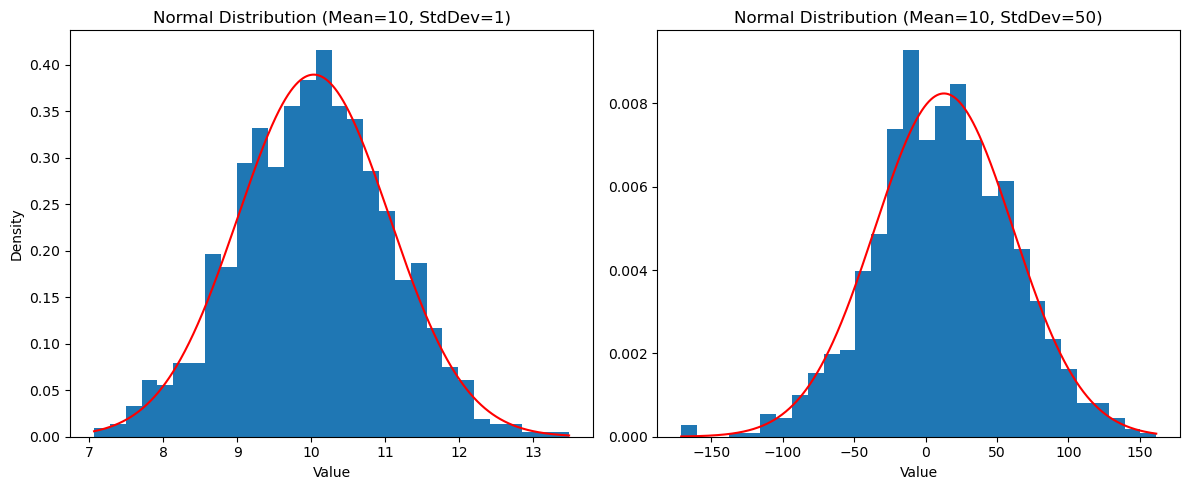

In [367]:
# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for the first set
plt.subplot(1, 2, 1)
plt.hist(set_1, bins=30, density=True, label="Histogram")

# Fit the data to a normal distribution and compute the PDF
mean_1, std_1 = norm.fit(set_1)  # Get the mean and standard deviation
x_1 = np.linspace(set_1.min(), set_1.max(), 1000)  # Generate x values
pdf_1 = norm.pdf(x_1, mean_1, std_1)  # Calculate the PDF

# Plot the PDF as a line
plt.plot(x_1, pdf_1, 'r-', label=f"Normal Fit (Mean={mean_1:.2f}, Std={std_1:.2f})")
plt.title("Normal Distribution (Mean=10, StdDev=1)")
plt.xlabel("Value")
plt.ylabel("Density")

# Histogram for the second set
plt.subplot(1, 2, 2)
plt.hist(set_2, bins=30, density=True, label="Histogram")

# Fit the data to a normal distribution and compute the PDF
mean_2, std_2 = norm.fit(set_2)  # Get the mean and standard deviation
x_2 = np.linspace(set_2.min(), set_2.max(), 1000)  # Generate x values
pdf_2 = norm.pdf(x_2, mean_2, std_2)  # Calculate the PDF

# Plot the PDF as a line
plt.plot(x_2, pdf_2, 'r-', label=f"Normal Fit (Mean={mean_2:.2f}, Std={std_2:.2f})")
plt.title("Normal Distribution (Mean=10, StdDev=50)")
plt.xlabel("Value")
# plt.gca().yaxis.set_ticklabels([])  # Optional: Remove y-axis labels for the second plot

# Adjust layout and show plot
plt.tight_layout()
plt.show()

How are the two distributions different?

#### Left Distribution: 
- Has a standard deviation of 1, which means the data points are tightly clustered around the mean (10). This creates a sharp and narrow bell shape.
- The curve is taller because more data points are concentrated close to the mean.
- Represents a dataset with low variability, as most values are close to the mean.
#### Right Distribution: 
- Has a standard deviation of 50, which causes the data points to spread widely around the mean (10). The bell shape is much broader and flatter.
- The curve is shorter because the data points are spread over a larger range, reducing the frequency density near the mean.
- Represents a dataset with high variability, where values deviate significantly from the mean.

#### Conclusion:
The left distribution has low variability (narrow bell shape), while the right distribution has high variability (broad bell shape). Both share the same mean but differ greatly in how the data points are spread around it.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [104]:
df = pd.read_csv('vehicles.csv')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

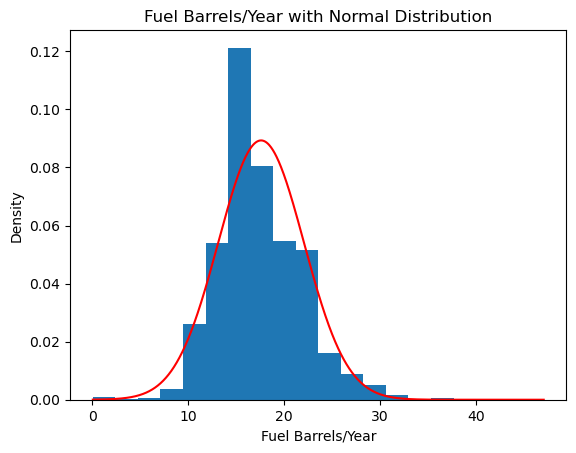

In [317]:
# df.hist('Fuel Barrels/Year')

data = df['Fuel Barrels/Year']

# Plot the histogram
plt.hist(data, bins=20, density=True, label="Histogram")

# Fit the data to a normal distribution and compute the PDF
mean, std = norm.fit(data)  # Get the mean and standard deviation
x = np.linspace(data.min(), data.max(), 1000)  # Generate x values
pdf = norm.pdf(x, mean, std)  # Calculate the PDF

# Plot the PDF as a line
plt.plot(x, pdf, 'r-', label=f"Normal Fit (Mean={mean:.2f}, Std={std:.2f})")

# Add labels and legend
plt.title("Fuel Barrels/Year with Normal Distribution")
plt.xlabel("Fuel Barrels/Year")
plt.ylabel("Density")

# Show the plot
plt.show()

In [ ]:
# your code here

2. CO2 Emission Grams/Mile 

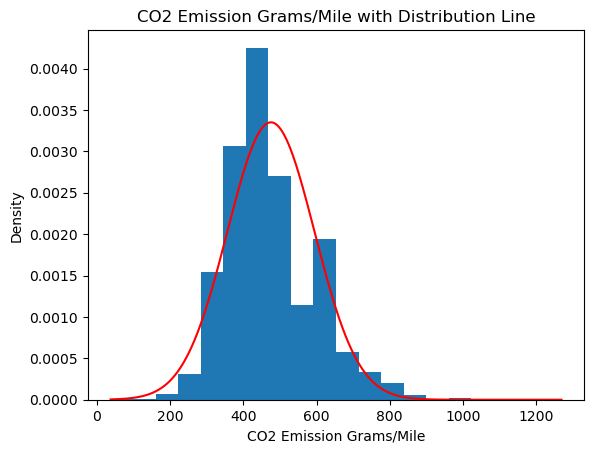

In [319]:
# df.hist('CO2 Emission Grams/Mile')

data = df['CO2 Emission Grams/Mile']

# Plot the histogram
plt.hist(data, bins=20, density=True,  label="Histogram")

# Fit the data to a normal distribution and compute the PDF
mean, std = norm.fit(data)  # Get the mean and standard deviation
x = np.linspace(data.min(), data.max(), 1000)  # Generate x values
pdf = norm.pdf(x, mean, std)  # Calculate the PDF

# Plot the PDF as a line
plt.plot(x, pdf, 'r-', label=f"Normal Fit (Mean={mean:.2f}, Std={std:.2f})")

# Add labels and legend
plt.title("CO2 Emission Grams/Mile with Distribution Line")
plt.xlabel("CO2 Emission Grams/Mile")
plt.ylabel("Density")
# plt.legend()

# Show the plot
plt.show()

In [ ]:
# your code here

3. Combined MPG

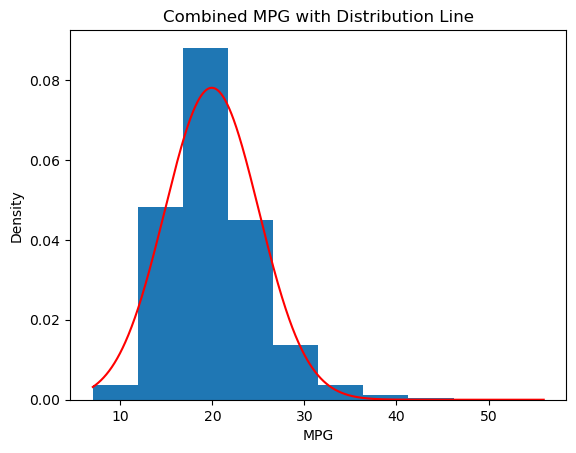

In [315]:
# df.hist('Combined MPG

data = df['Combined MPG']

# Plot the histogram
plt.hist(data, bins=20, density=True,  label="Histogram")

# Fit the data to a normal distribution and compute the PDF
mean, std = norm.fit(data)  # Get the mean and standard deviation
x = np.linspace(data.min(), data.max(), 1000)  # Generate x values
pdf = norm.pdf(x, mean, std)  # Calculate the PDF

# Plot the PDF as a line
plt.plot(x, pdf, 'r-', label=f"Normal Fit (Mean={mean:.2f}, Std={std:.2f})")

# Add labels and legend
plt.title("Combined MPG with Distribution Line")
plt.xlabel("MPG")
plt.ylabel("Density")

# Show the plot
plt.show()

In [ ]:
# your code here

Which one(s) of the variables are nearly normally distributed? How do you know?

#### From the histograms, we can analyze which of the variables are nearly normally distributed:

#### Variables:
##### Fuel Barrels/Year:
- The histogram shows a slight skew to the right, with a concentration of values on the left and a long tail extending to the right.
- The red normal distribution line does not align well with the histogram, especially on the right side. This indicates that it is not normally distributed as it lacks symmetry.
##### CO2 Emission Grams/Mile:
- The histogram appears more symmetric and bell-shaped compared to the other variables.
- The red normal distribution line closely aligns with the histogram, indicating a good fit to the normal distribution. While it is not perfectly symmetric, it is nearly normally distributed, as the data closely follows the normal distribution red line shape.
##### Combined MPG:
- The histogram shows a right-skewed distribution, with values concentrated on the lower end and a tail extending to the right.
- The red normal distribution line does not align well, especially on the right side where the histogram has more density than the normal curve predicts. This indicates that it is not normally distributed as it is not symmetric.

#### Conclusions:
The variable CO2 Emission Grams/Mile is the closest to being normally distributed because its histogram shows a relatively symmetric, bell-shaped curve compared to the others. However, it is not a perfect normal distribution due to slight skewness.

In [ ]:
# your code here

None of them are normally ditributed. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [164]:
def generate_exponential_distribution(mean, size):
    """
    Generate a list of numbers exponentially distributed with the given mean.
    """
    scale = mean  # The scale parameter is the inverse of the rate (1/lambda)
    return np.random.exponential(scale=scale, size=size)

In [170]:
# Generate two number sequences with size 10 and 100
data_10 = generate_exponential_distribution(mean=10, size=1000)
data_100 = generate_exponential_distribution(mean=100, size=1000)

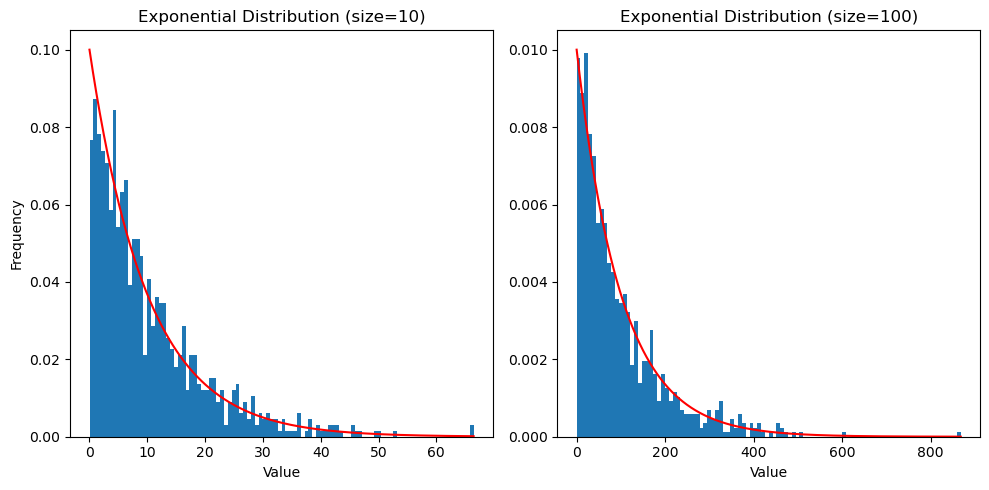

In [369]:
from scipy.stats import expon


# Plot histograms with bins=100
plt.figure(figsize=(10, 5))

#
# Histogram for the first sequence (size=10)
plt.subplot(1, 2, 1)
plt.hist(data_10, bins=100, density=True, label="Histogram")

x_10 = np.linspace(0, np.max(data_10), 1000)
pdf_10 = expon.pdf(x_10, scale=10)  # PDF for mean=10
plt.plot(x_10, pdf_10, 'r-', label="PDF (Mean=10)")

plt.title("Exponential Distribution (size=10)")
plt.xlabel("Value")
plt.ylabel("Frequency")


#
# Histogram for the second sequence (size=100)
plt.subplot(1, 2, 2)
plt.hist(data_100, bins=100, density=True, label="Histogram")

x_100 = np.linspace(0, np.max(data_100), 1000)
pdf_100 = expon.pdf(x_100, scale=100)  # PDF for mean=100
plt.plot(x_100, pdf_100, 'r-', label="PDF (Mean=100)")

plt.title("Exponential Distribution (size=100)")
plt.xlabel("Value")


# Adjust layout and show plot
plt.tight_layout()
plt.show()

How are the two distributions different?

The mean changes, so the distribution changes as well. 

Both distributions exhibit the characteristic exponential decay, where higher values occur less frequently. However, the right distribution has a slower decay rate due to the larger mean, while the left distribution decays more quickly.

#### Left Distribution (size=10):
- This distribution is generated with a smaller scale (mean = 10). The values are concentrated within a smaller range, roughly between 0 and 50.
- The left distribution decays more quickly because it has a smaller mean (10). This results in more frequent occurrences of smaller values and a steeper decline in the histogram.
- The left distribution has a smaller range and faster decay due to the smaller mean (scale=10).
#### Right Distribution (size=100):
- This distribution has a larger scale (mean = 100). The values are spread over a much larger range, extending beyond 800.
- The right distribution decays more slowly due to the larger mean (100), resulting in a wider spread and less steep decline.
- The right distribution has a larger range and slower decay due to the larger mean (scale=100).

The red PDF line follows the characteristic exponential decay curve in both distributions. However, for the left distribution, the curve is steeper, while for the right distribution, the curve is broader and flatter.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [347]:
# your answer here
# Hint: This is same as saying P(x<15)

# Parameters
mean = 10  # mean time in minutes
lambda_rate = 1 / mean  # λ = 1/mean
x = 15  # time in minutes

In [349]:
# Calculate the probability of spending less than 15 minutes usign the CDF formula
probability_less_than_15 = 1 - math.exp(-lambda_rate * x)

print(f"The probability that a customer will spend less than 15 minutes in the bank is {probability:.4f}")

The probability that a customer will spend less than 15 minutes in the bank is 0.7769


**This means there is approximately a 77.69% chance that a customer will spend less than 15 minutes in the bank.**

What is the probability that the customer will spend more than 15 minutes

In [351]:
# Calculate the probability of spending more than 15 minutes
probability_more_than_15 = 1 - probability_less_than_15

print(f"The probability that a customer will spend more than 15 minutes in the bank is {probability_more_than_15:.4f}")

The probability that a customer will spend more than 15 minutes in the bank is 0.2231


**This means there is approximately a 22.31% chance that a customer will spend more than 15 minutes in the bank.**